In [3]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from scripts.analysis import data, plot

plot.init_matplotlib()
W, H = 5.5, 2.5

def pad_missing_months(ts: pd.Series) -> pd.Series:
    start, end = ts.index[0], ts.index[-1]
    all_months = map(
        lambda month: month.strftime("%Y-%m"),
        pd.date_range(start=start, end=end, freq="MS"),
    )
    return ts.reindex(all_months, fill_value=0)

In [4]:
repos_in_campaign = data.get_repos_with_campaign()
repos = data.get_fake_star_repos()
deleted = set(repos[repos.repo_id.isna()].repo_name)

In [5]:
TRENDING_REPO = "data/trending_archive"
MONTH_TO_TRENDING = defaultdict(set)
pattern = re.compile(r'^\d{4}-\d{2}-\d{2}\.md$')
for root, dir, files in os.walk(TRENDING_REPO):
    for file_name in files:
        if pattern.match(file_name):
            with open(os.path.join(root, file_name), 'r') as file:
                content = file.read()
                repos = re.findall(r'https://github\.com/([\w-]+/[\w-]+)', content)
                for repo in repos:
                    month = file_name[:7]
                    MONTH_TO_TRENDING[month].add(repo)

In [6]:
github_repos, ts_all, ts_deleted = set(), {}, {}
for month, repos in sorted(MONTH_TO_TRENDING.items()):
    if len(repos & repos_in_campaign) > 0:
        print(month, len(repos & repos_in_campaign), len(repos), repos & repos_in_campaign)
        github_repos |= repos & repos_in_campaign
        if month > "2019":
            ts_all[month] = (len(repos & repos_in_campaign))
            ts_deleted[month] = (len(repos & repos_in_campaign & deleted))
ts_all = pad_missing_months(pd.Series(ts_all))
ts_deleted = pad_missing_months(pd.Series(ts_deleted))
print(len(github_repos))

2015-12 1 606 {'SuperTux/supertux'}
2016-09 1 840 {'SuperTux/supertux'}
2019-08 1 1340 {'harmony-one/harmony'}
2019-10 1 1275 {'insight-chain/inb-go'}
2019-11 1 1293 {'harmony-one/harmony'}
2019-12 1 1094 {'SuperTux/supertux'}
2021-02 1 1720 {'holochain/holochain'}
2021-03 1 1799 {'holochain/holochain'}
2021-04 2 1619 {'harmony-one/harmony', 'holochain/holochain'}
2021-05 2 1888 {'harmony-one/harmony', 'holochain/holochain'}
2021-07 1 1671 {'Wilfred/difftastic'}
2021-08 1 1857 {'kazura233/web-daemon'}
2021-09 1 1642 {'Wilfred/difftastic'}
2021-12 1 1830 {'SuperTux/supertux'}
2022-01 1 1902 {'nftdevs/NFTs-Upload-to-OpenSea'}
2022-03 1 1915 {'Wilfred/difftastic'}
2022-04 2 1842 {'MagicedenMinter/SolanaMint', 'Wilfred/difftastic'}
2022-05 2 1856 {'marsCXXV/Magiceden-bot', 'help-iq2/telethon'}
2022-06 2 1813 {'FastMiners/Gminer', 'Wilfred/difftastic'}
2022-07 2 1855 {'numbersprotocol/nit', 'Wilfred/difftastic'}
2022-08 1 1949 {'Wilfred/difftastic'}
2022-09 2 1882 {'therealgliz/blooket-hack

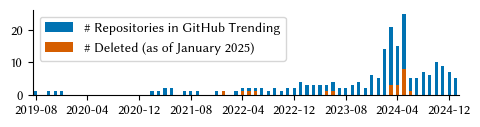

: 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(W, H/2))
ts_all.plot(kind="bar", ax=ax, color="C0")
ts_deleted.plot(kind="bar", ax=ax, color="C2")
ax.legend(
    labels=[
        "# Repositories in GitHub Trending",
        "# Deleted (as of January 2025)",
    ]
)
ax.set_xticks(range(0, len(ts_all), 8))
ax.set_xticklabels(ts_all.index[::8])
ax.set_xlabel("")
plot.remove_spines(ax)
fig.autofmt_xdate(rotation=0, ha="center")
fig.savefig("plots/ts_trending.pdf", bbox_inches="tight")